<a href="https://colab.research.google.com/github/aryachandrak/Machine-Learning-2024-Ganjil/blob/main/Jobsheet4/Praktikum1_Klasifikasi_SVM_dengan_Data_Dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Terpisah Secara Linear

In [1]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

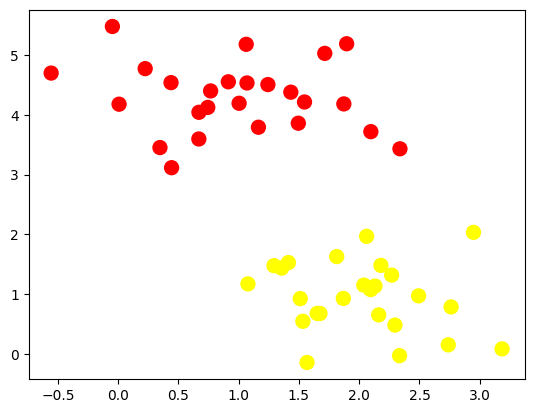

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='autumn')

# Penjelasan kode dari baris ke 2
# make_blobs digunakan untuk membuat data sintesis berupa kluster
# n_sample=50 berarti jumlah sample data 50
# centers=2 berarti terdapat 2 kluster
# ramdom_state digunakan agar data akan tetap sama jika dijalankan ulang
# cluster_std=0.60 berarti penyebaran data sekitar 0.6 dari pusat cluster(centroid)

# penjelasan kode dari baris ke 3
# plt.scatter merupakan fungsi dari matplotlib untuk membuat scatter plot
# X[:, 0], X[:, 1] menghasilkan koordinat x dan y
# c=y otomatis mewarnai titik berdasarkan kluster
# s=50 mengatur ukuran titik
# cmap='autumn' mengatur warna yang digunakan

In [ ]:
print(X.shape)
print(y.shape)
print("\n")
print(X[:5])
print(y[:5])

# X akan menyimpan koordinat titik data yaitu (x, y)
# y akan menyimpan nilai cluster, disini hanya ada 2 kluster sehingga nilainya hanya akan ada 0 dan 1

(50, 2)
(50,)


[[1.41281595 1.5303347 ]
 [1.81336135 1.6311307 ]
 [1.43289271 4.37679234]
 [1.87271752 4.18069237]
 [2.09517785 1.0791468 ]]
[1 1 0 0 1]


(-1.0, 3.5)

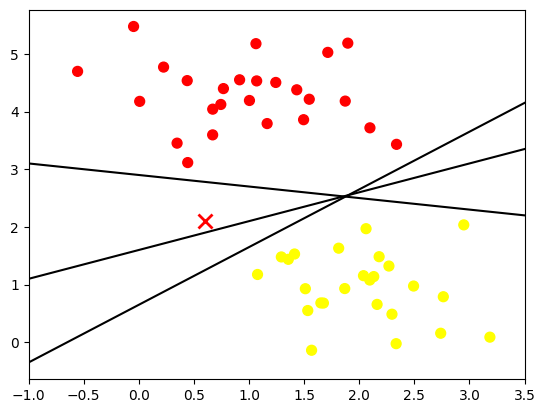

In [ ]:
xfit = np.linspace(-1, 3.5, num=10)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

#Penjelasan kode baris ke 1
#np.linspace(-1, 3.5, num=10) digunakan untuk menentukan 10 titik dari rentang -1 sampai 3.5 jarak antar titik sama,
#jika tidak diberikan parameter num maka nilai defaultnya 50

#Penjelasan kode baris ke 3
# [0.6], [2.1] memberikan koordinat pada satu titik
# 'x' memberikan marker berbentuk x
# color='red' warna marker
# markeredgewidth=2 tebal garis pada marker
# markersize=10 ukuran marker

#Penjelasan baris ke 5
# m berarti kemiringan dan b berarti intersep(titik dimana garis memotong sumbu-y ketika nilai x=0)
# (1, 0.65) berarti m = 1, dan b = 0.65

#Penjelasan baris ke 6
#plt.plot untuk membuat garis
#(x.fit, m*xfit+b) menunjukan koordinat (x, y)
# -k untuk (-) berarti solid line dan k berarti garis berwarna hitam

#Penjelasan baris ke 8
#plt.xlim() mengatur batas sumbu-x dari -1 hingga 3.5, membatasi area yang terlihat pada plot.

In [ ]:
print(xfit)

[-1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5]


(-1.0, 3.5)

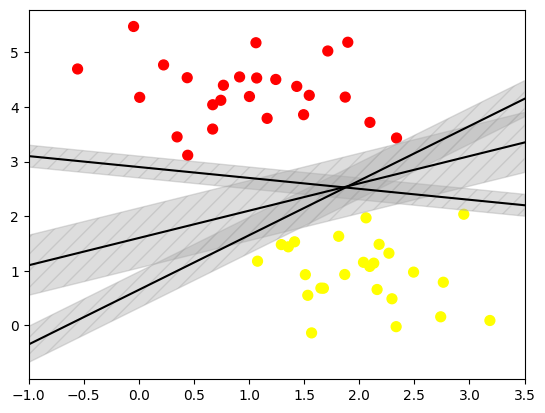

In [3]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4, hatch='//')


plt.xlim(-1, 3.5)

#Penjelasan kode
# kode sama seperti sebelumnya hanya saja ditambah plt.fill_beetween untuk mengarsir area diantara garis
# garis yang diarsir adalah antara (xfit, yfit-d) sampai (xfit, yfit+d)
# edgecolor='none' berarti menghilangkan garis tepi diarea yang diarsir
# alpha=0,4 berarti opacity atau transparansi sebanyak 40%

Penerapa fitting SVM

In [4]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

# Penjelasan kode
# SVC() adalah konstruktor untuk membangun model SVM
# kernel='linear' ini menentukan kernel yang akan digunakan oleh SVM
# C=1E10, variabel C merupakan parameter regulasi semakin besar nilai C semakin sedikit toleransi terhadap kesalahan klasifikasi

SVC(C=10000000000.0, kernel='linear')

In [23]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim() # xlim[0] mendapatkan limit nilai awal dan xlim[1] mendapatkan limit nilai akhir
    ylim = ax.get_ylim() # ylim[0] mendapatkan limit nilai awal dan ylim[1] mendapatkan limit nilai akhir

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30) # membuat 30 titik yang tersebar secara merata dari xlim[0] hingga xlim[1]
    y = np.linspace(ylim[0], ylim[1], 30) # membuat 30 titik yang tersebar secara merata dari ylim[0] hingga ylim[1]

    Y, X = np.meshgrid(y, x) # menghasilkan dua matriks 2D yang mengandung semua kombinasi nilai x dan y
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    # ravel() digunakan untuk membuat matriks 2D menjadi 1D
    # vstack() digunakan untuk menumpuk array 1D secara vertikal sehingga mendapatkan nilai (x,y)
    # .T berguna untuk mentransposisikan array sehingga setiap baris adalah pasangan, hasilnya setiap baris mewakili satu titik (x,y)
    P = model.decision_function(xy).reshape(X.shape)
    # reshape(X.shape) mengembalikan bentuk data ke awal
    # decision_function() pada model SVM digunakan untuk menghitung nilai decision function di setiap titik dalam grid.

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

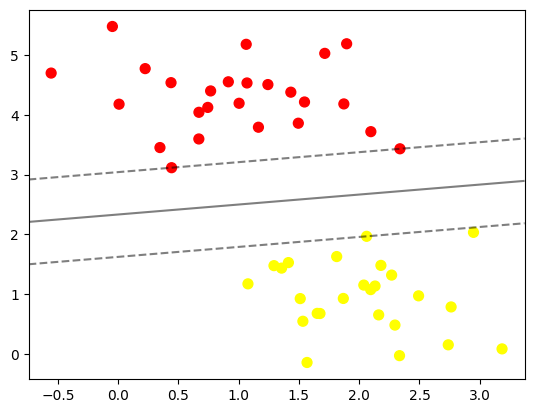

In [24]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [25]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

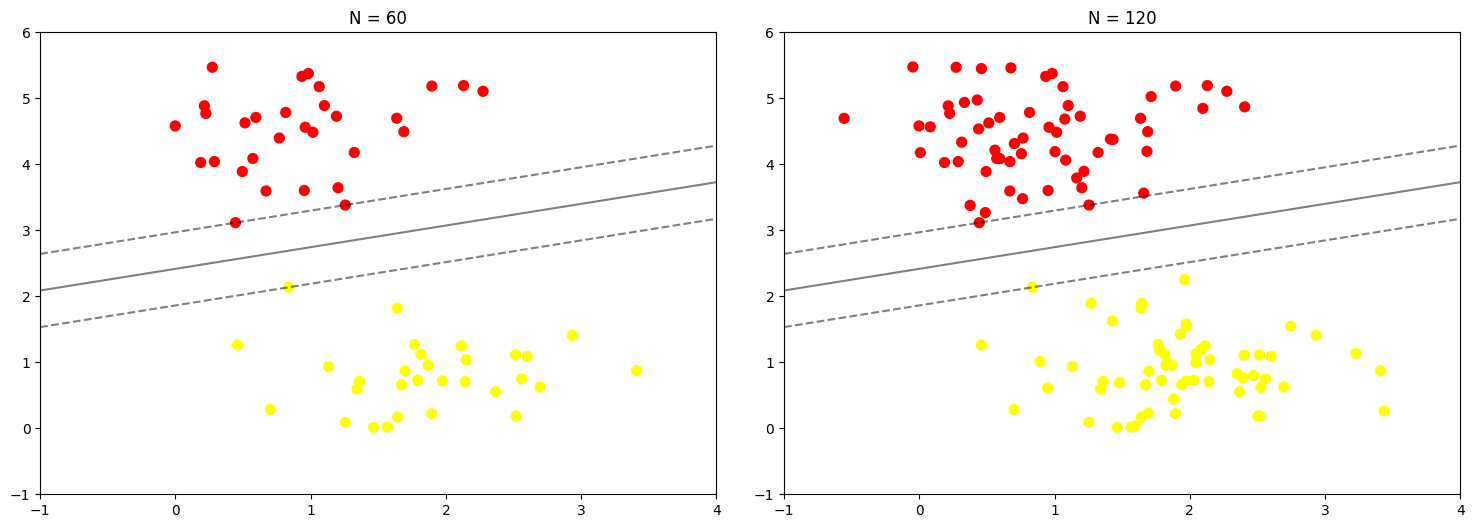

In [26]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

##Data Tidak Terpisah Secara Linier

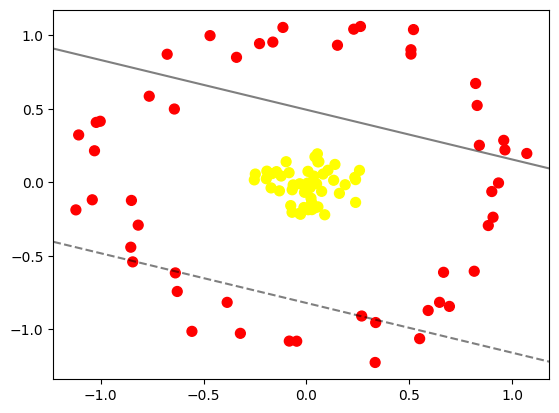

In [27]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [28]:
r = np.exp(-(X ** 2).sum(1))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.05606055, -0.16689767],
       [-0.38536465, -0.81708662],
       [ 0.0223558 , -0.10781106],
       [ 0.00766604,  0.07498591],
       [-0.06419961, -0.01736557],
       [-0.32109495, -1.02797752],
       [-0.4686141 ,  0.99888936],
       [ 0.00880092, -0.18639881],
       [-0.13116005, -0.05790839],
       [ 0.08917692, -0.22084601],
       [ 0.59222981, -0.87244861],
       [-1.03058604,  0.21495603],
       [-0.00922434, -0.06782788],
       [-0.24846593,  0.05637833],
       [ 0.03586853,  0.04241906],
       [-0.02868922, -0.21747374],
       [-0.8540615 , -0.44162839],
       [ 0.15108958,  0.93323811],
       [-1.00275411,  0.4158417 ],
       [ 0.23020954,  1.04259446],
       [ 0.55084891, -1.06421399],
       [ 0.04953211, -0.01016356],
       [ 0.50847609,  0.90275251],
       [-0.03396026, -0.21122942],
       [ 0.05585945,  0.13945689],
       [ 0.1047407 ,  0.08227417],
       [ 0.52086003,  1.03999062],
       [-0.00126328, -0.05210462],
       [ 0.33703852, -0.95445965],
       [-0.09855829,  0.140362  ],
       [ 0.90782203, -0.23739919],
       [-0.84476308, -0.54151232],
       [-0.16321792,  0.9549738 ],
       [-1.1210748 , -0.18748928],
       [ 0.08091673,  0.05637316],
       [-1.02222597,  0.40802616],
       [-0.0690895 , -0.05055331],
       [-0.07620458, -0.15845475],
       [ 0.0053841 , -0.00531441],
       [ 0.02591571, -0.1384346 ],
       [ 0.04156756,  0.17388924],
       [-0.17187   , -0.03797417],
       [ 0.82317145,  0.67308966],
       [ 0.18856127, -0.01619639],
       [ 0.50864692,  0.87289086],
       [ 0.13257227,  0.01408443],
       [-0.67711736,  0.8720548 ],
       [-0.03253336, -0.00951401],
       [ 0.2355116 ,  0.03371502],
       [-1.04139693, -0.11882222],
       [-0.11415194,  1.05458042],
       [-0.04705105, -1.08152159],
       [ 0.02475494, -0.14986486],
       [ 0.13894797,  0.12195632],
       [-0.0831842 , -1.08077951],
       [-0.19496692,  0.0245196 ],
       [-0.01207194, -0.17143126],
       [ 0.0741386 , -0.06137091],
       [-0.1227558 ,  0.04285958],
       [ 0.06077627,  0.1409332 ],
       [-0.14542791,  0.07273266],
       [ 0.64771053, -0.81691343],
       [-1.10758389,  0.32267228],
       [-0.76433381,  0.58629329],
       [-0.81798641, -0.29140166],
       [ 0.6956304 , -0.84460517],
       [-0.55671235, -1.01448879],
       [ 0.83049719,  0.52337329],
       [-0.64218646,  0.49915884],
       [-0.0842326 ,  0.06564903],
       [-0.22794161,  0.94445657],
       [ 0.16056405, -0.07497612],
       [ 0.33440245, -1.22637763],
       [-0.63740251, -0.61653546],
       [ 0.66714453, -0.61253561],
       [ 0.90175695, -0.06256681],
       [-0.06983323, -0.20396938],
       [-0.85101565, -0.12311722],
       [ 1.07198107,  0.19650649],
       [-0.19227259,  0.07617861],
       [ 0.2393534 , -0.13668383],
       [ 0.88470113, -0.29397314],
       [ 0.04231633, -0.17304476],
       [ 0.26890595, -0.91004722],
       [ 0.23914699,  0.01854635],
       [ 0.05348751,  0.19414041],
       [ 0.93439793, -0.00411711],
       [ 0.01781743, -0.03645264],
       [ 0.96562969,  0.22077764],
       [-0.06285135, -0.02595687],
       [ 0.02633721, -0.18585112],
       [ 0.2629237 ,  1.06109788],
       [ 0.25820518,  0.08136848],
       [ 0.81630753, -0.60522751],
       [-0.16696414,  0.0594706 ],
       [-0.3398832 ,  0.85106758],
       [ 0.95977275,  0.28581744],
       [ 0.84121133,  0.2521792 ],
       [-0.62811842, -0.74297939],
       [-0.25337782,  0.01670998]]), y=array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]))>

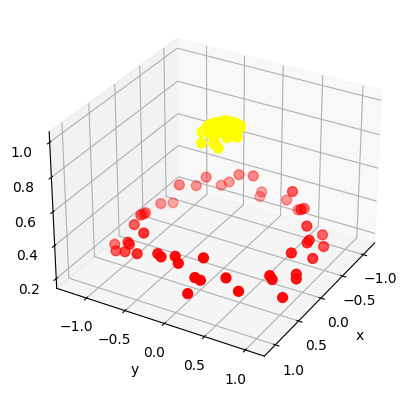

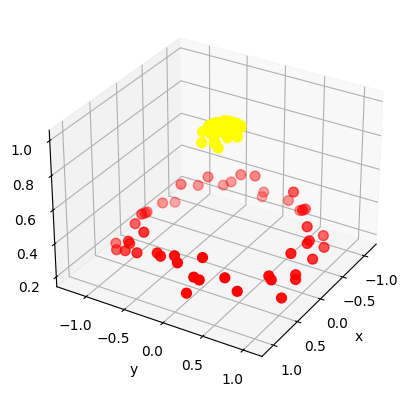

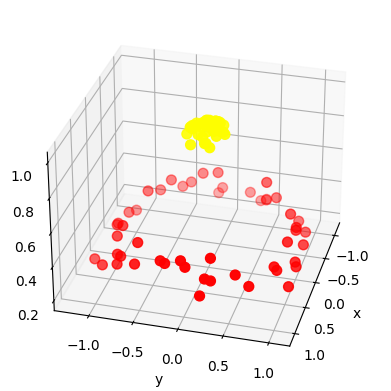

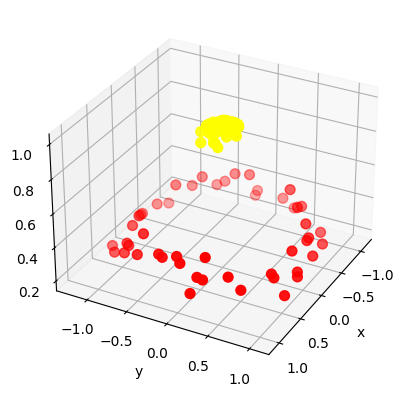

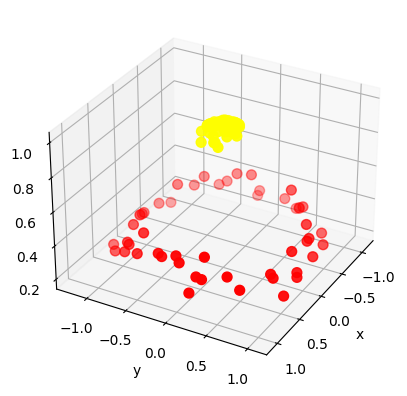

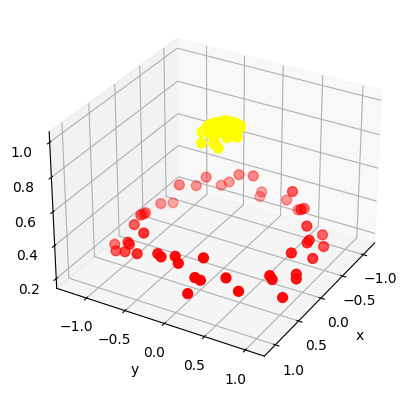

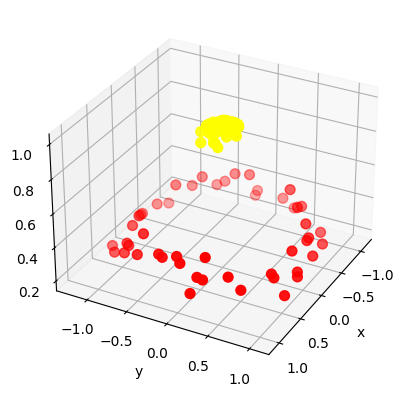

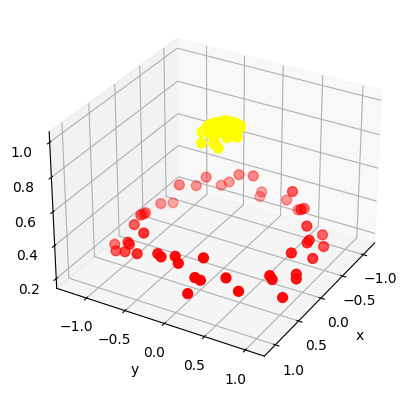

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

In [31]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

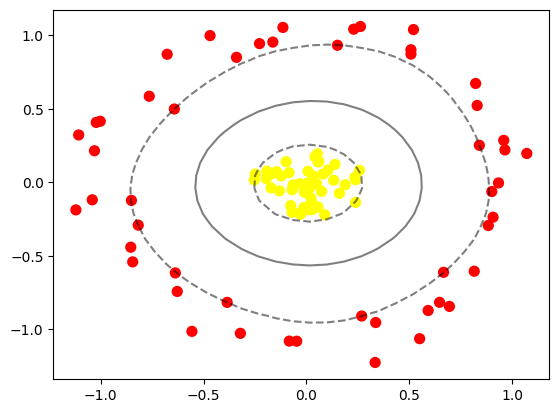

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Data Overlap

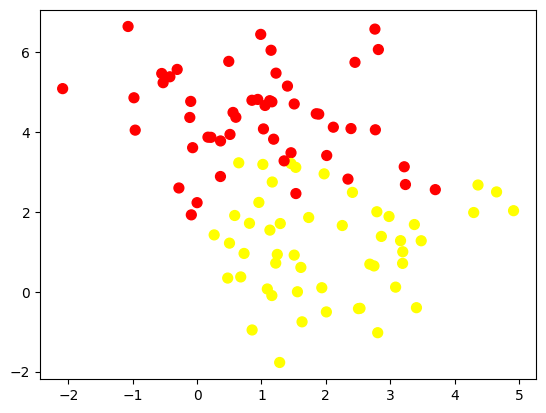

In [33]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

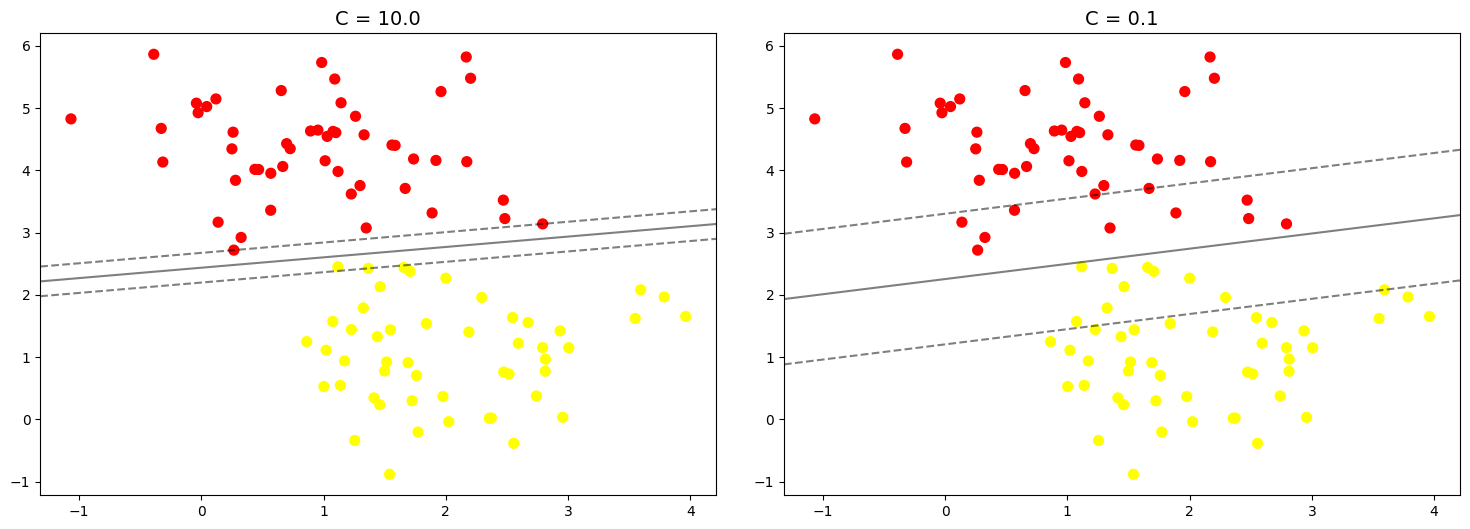

In [34]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)